In [1]:
import pandas as pd
import numpy as np

# Generating mock data
np.random.seed(42)

data = pd.DataFrame({
    'sensor_1': np.random.normal(0, 1, 1000),
    'sensor_2': np.random.normal(0, 1, 1000),
    'sensor_3': np.random.normal(0, 1, 1000),
    'operational_hours': np.random.randint(100, 5000, 1000),
    'maintenance': np.random.choice([0, 1], 1000, p=[0.95, 0.05])
})

# Simulating remaining useful life (RUL) based on operational hours and sensor readings
data['RUL'] = 5000 - data['operational_hours'] - (data['sensor_1'] + data['sensor_2'] + data['sensor_3']).cumsum()

# Save to CSV
data.to_csv('machinery_data.csv', index=False)


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('machinery_data.csv')

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Feature selection
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

# Normalize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Split data for regression and classification
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data[features], data[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data[features], data[target_maintenance], test_size=0.2, random_state=42)


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse_reg}")


Regression Model MSE: 1103.2844396957576


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train classification model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))


Classification Model Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



/opt/homebrew/Caskroom/miniconda/base/envs/Major/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/Major/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/Major/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

/opt/homebrew/Caskroom/miniconda/base/envs/Major/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


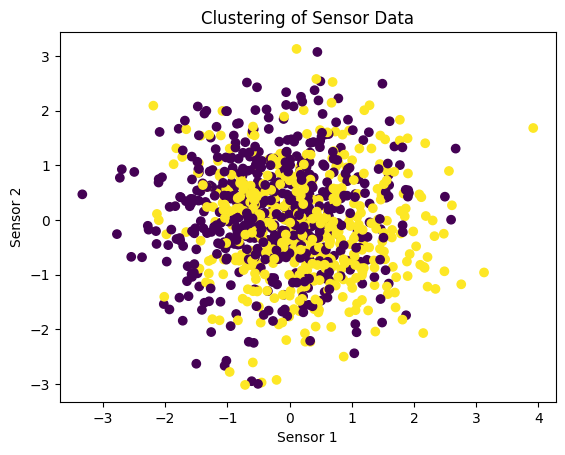

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualize clustering results
plt.scatter(data['sensor_1'], data['sensor_2'], c=data['cluster'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering of Sensor Data')
plt.show()


In [6]:
def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

# Example prediction
sample_features = [0.1, 0.2, 0.3, 1000]
prediction = predict_maintenance(sample_features)
print(prediction)


{'RUL Prediction': -2.678206262696707, 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Anomaly'}


/opt/homebrew/Caskroom/miniconda/base/envs/Major/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/Major/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/Major/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
